In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [7]:
univariate_column_label=['DEWIHOBT9_I0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_MWT0']

In [8]:
size_column = len(univariate_column_label)
print(size_column)

4


In [9]:
univariate_data=test_new.iloc[2000:7000][univariate_column_label]
univariate_data=univariate_data.loc[::-1]
print(univariate_data.head())

                     DEWIHOBT9_I0  AEDAHO_T9_V2  AEWIHO_T9AV2  RWWIHOB_MWT0
dateTime                                                                   
2019-04-06 00:21:00         100.0     72.427071     76.598087     95.920205
2019-04-06 00:22:00         100.0     71.620643     76.358689     95.839281
2019-04-06 00:23:00         100.0     70.606738     77.241097     95.820845
2019-04-06 00:24:00         100.0     70.531626     77.062413     95.668621
2019-04-06 00:25:00         100.0     70.692115     76.297974     95.543627


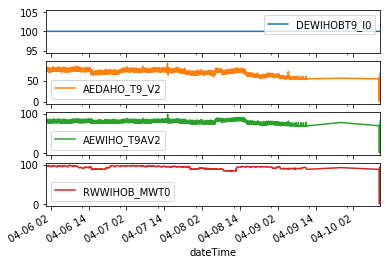

In [10]:
ax = univariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [11]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in univariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  0


In [12]:
if zero_index.size > 0:
    univariate_data_modify = univariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    univariate_data_modify = univariate_data

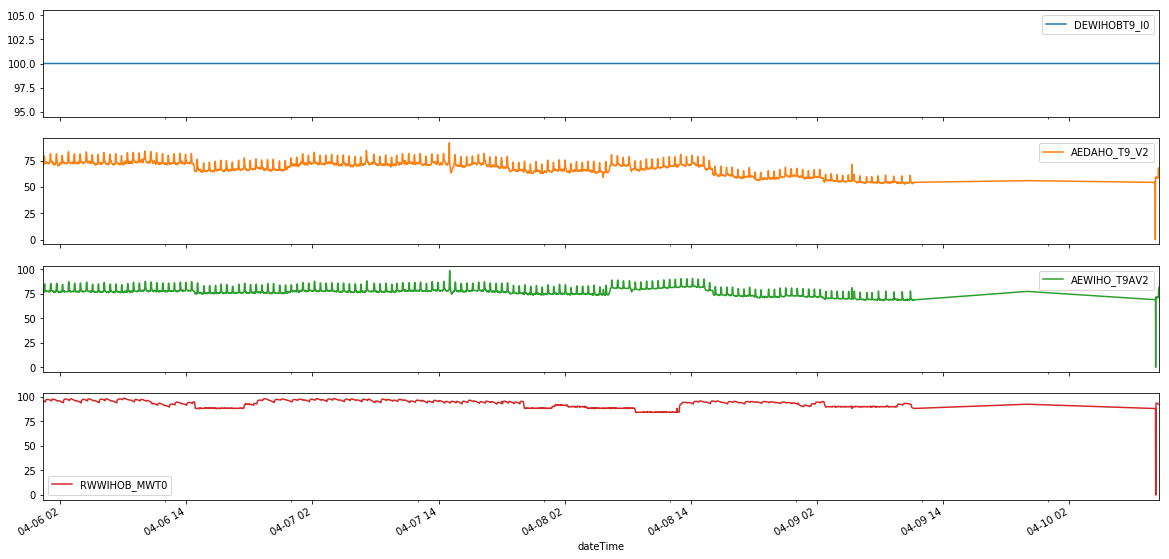

In [13]:
bx = univariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [14]:
univariate_data_1= univariate_data_modify.drop(['DEWIHOBT9_I0','AEWIHO_T9AV2','RWWIHOB_MWT0'], axis=1)
univariate_data_2= univariate_data_modify.drop(['DEWIHOBT9_I0','AEDAHO_T9_V2','RWWIHOB_MWT0'], axis=1)
univariate_data_3= univariate_data_modify.drop(['DEWIHOBT9_I0','AEWIHO_T9AV2','AEDAHO_T9_V2'], axis=1)

In [15]:
print('univariate_data_1 head: \n',univariate_data_1.head())
print('univariate_data_2 head: \n',univariate_data_2.head())
print('univariate_data_3 head: \n',univariate_data_3.head())

univariate_data_1 head: 
                      AEDAHO_T9_V2
dateTime                         
2019-04-06 00:21:00     72.427071
2019-04-06 00:22:00     71.620643
2019-04-06 00:23:00     70.606738
2019-04-06 00:24:00     70.531626
2019-04-06 00:25:00     70.692115
univariate_data_2 head: 
                      AEWIHO_T9AV2
dateTime                         
2019-04-06 00:21:00     76.598087
2019-04-06 00:22:00     76.358689
2019-04-06 00:23:00     77.241097
2019-04-06 00:24:00     77.062413
2019-04-06 00:25:00     76.297974
univariate_data_3 head: 
                      RWWIHOB_MWT0
dateTime                         
2019-04-06 00:21:00     95.920205
2019-04-06 00:22:00     95.839281
2019-04-06 00:23:00     95.820845
2019-04-06 00:24:00     95.668621
2019-04-06 00:25:00     95.543627


In [16]:
from numpy import nan
univariate_data_drop_zero_1 = univariate_data_1.replace(0,nan)
univariate_data_drop_zero_1 = univariate_data_drop_zero_1.dropna(how='any',axis=0)

univariate_data_drop_zero_2 = univariate_data_2.replace(0,nan)
univariate_data_drop_zero_2 = univariate_data_drop_zero_2.dropna(how='any',axis=0)

univariate_data_drop_zero_3 = univariate_data_3.replace(0,nan)
univariate_data_drop_zero_3 = univariate_data_drop_zero_3.dropna(how='any',axis=0)

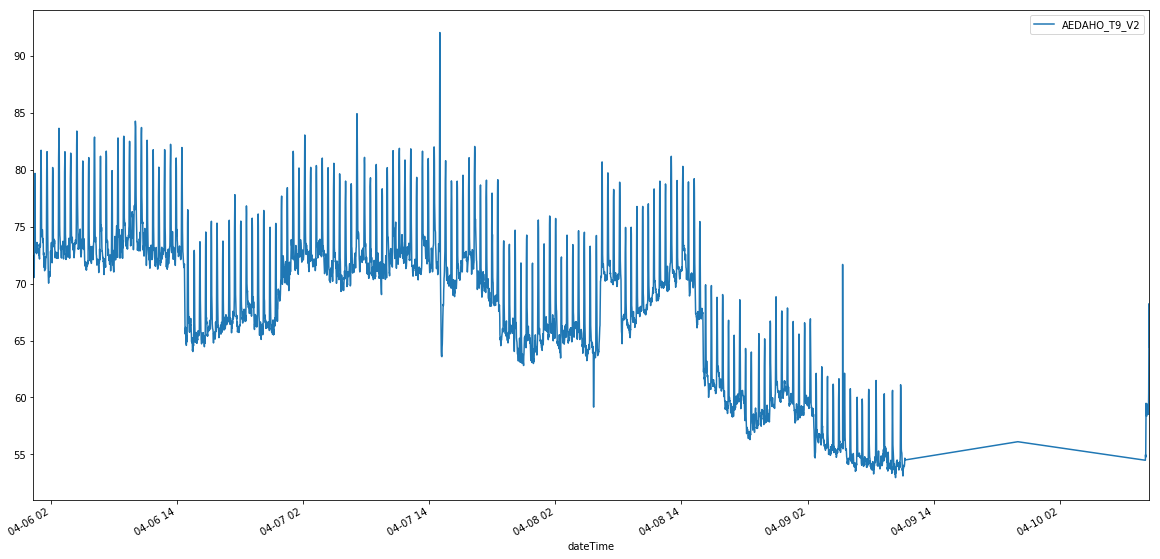

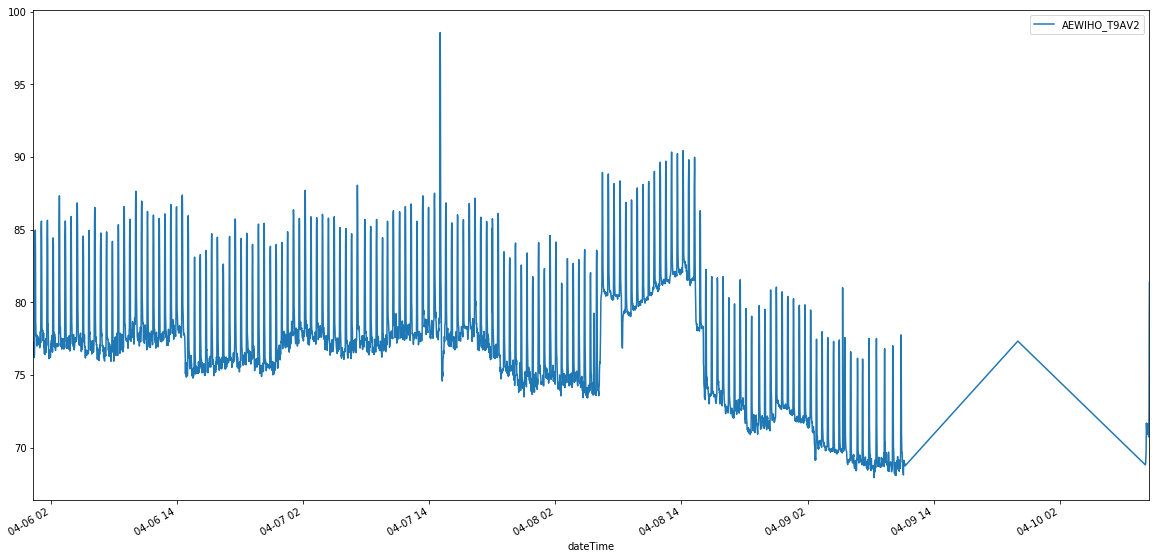

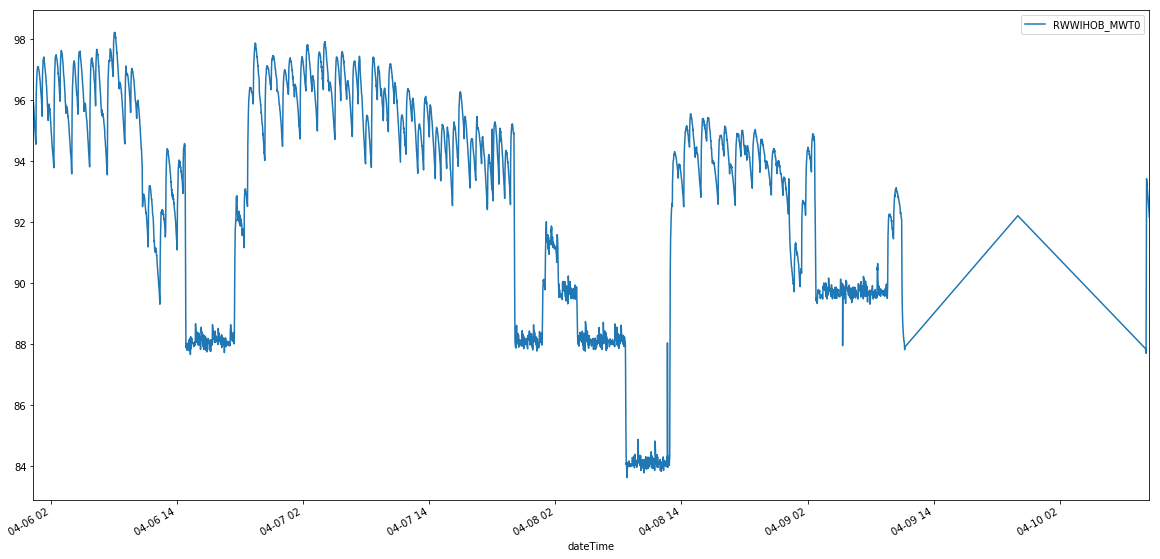

In [18]:
cx = univariate_data_drop_zero_1.plot()
dx = univariate_data_drop_zero_2.plot()
ex = univariate_data_drop_zero_3.plot()
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [19]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.9)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    train_data = dataset[0:NumberOfElements]
    test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

# train_data_conv, test_data_conv = make_dataset(univariate_data_drop_zero_1)
train_data_conv, test_data_conv = make_dataset(univariate_data_drop_zero_2)
# train_data_conv, test_data_conv = make_dataset(univariate_data_drop_zero_3)
print('train_data_conv shape: ', train_data_conv.shape)
print('test_data_conv shape: ', test_data_conv.shape)

dataset length:  4999
Number of Elements for training:  4499
train_data_conv shape:  (4499, 1)
test_data_conv shape:  (500, 1)


In [20]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

C:\Users\atif\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
# split a multivariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [22]:
n_steps_1 = 4
# split into samples
X_conv_LSTM, y_conv_LSTM = split_sequence(train_data_conv, n_steps_1)

In [23]:
print('X_conv_LSTM shape: ', X_conv_LSTM.shape)
print('y_conv_LSTM shape: ', y_conv_LSTM.shape)

X_conv_LSTM shape:  (4495, 4, 1)
y_conv_LSTM shape:  (4495, 1)


In [24]:
n_features = X_conv_LSTM.shape[-1]
n_seq = 2
n_steps_2 = 2
n_rows=1
X_conv_LSTM_train = X_conv_LSTM.reshape((X_conv_LSTM.shape[0], n_seq, n_rows, n_steps_2, n_features))

In [25]:
print('X_conv_LSTM shape: ',X_conv_LSTM.shape,'\tX_conv_LSTM size: ',X_conv_LSTM.size,'\tX_conv_LSTM dimension: ',X_conv_LSTM.ndim)
print('X_conv_LSTM_train shape: ',X_conv_LSTM_train.shape,'\tX_conv_LSTM_train size: ',X_conv_LSTM_train.size,'\tX_conv_LSTM_train dimension: ',X_conv_LSTM_train.ndim)

X_conv_LSTM shape:  (4495, 4, 1) 	X_conv_LSTM size:  17980 	X_conv_LSTM dimension:  3
X_conv_LSTM_train shape:  (4495, 2, 1, 2, 1) 	X_conv_LSTM_train size:  17980 	X_conv_LSTM_train dimension:  5


In [26]:
# define model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps_2, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [27]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 1, 64)          33536     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# fit model
train_model=model.fit(X_conv_LSTM_train, y_conv_LSTM, batch_size=batch_size, epochs=epochs, verbose=3,
         callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/conv_LSTM_norm_100.h5', save_best_only=True)])

Epoch 1/30


C:\Users\atif\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


In [30]:
X_conv_LSTM_test, y_conv_LSTM_test = split_sequence(test_data_conv, n_steps_1)
n_feature_test = X_conv_LSTM_test.shape[-1]
x_input = X_conv_LSTM_test.reshape((X_conv_LSTM_test.shape[0], n_seq, 1, n_steps_2, n_feature_test ))

print('x_input shape: ', x_input.shape)

x_input shape:  (496, 2, 1, 2, 1)


In [31]:
yhat = model.predict(x_input, verbose=1)

496/496 [==============================] - 0s 335us/step


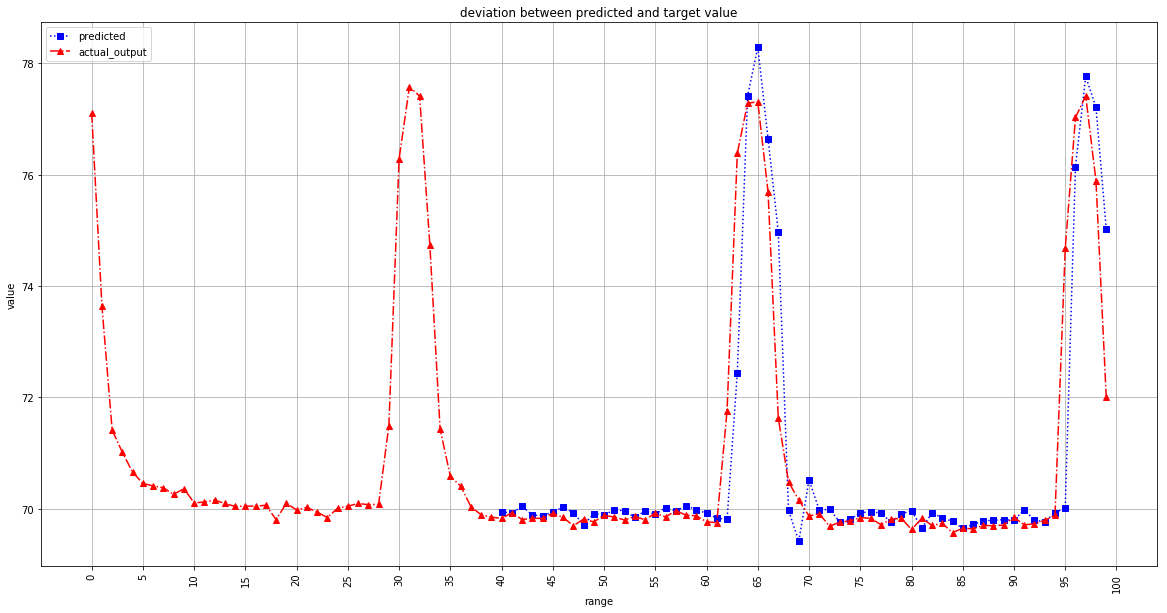

In [104]:
x_data = range(100)
plt.plot(x_data[40:],yhat[40:100],color='blue',marker='s', linestyle=':')
plt.plot(x_data[:],y_conv_LSTM_test[0:100],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,105,5))
plt.xticks( rotation=90)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# look at the below graph. here, predicted output yhat started from 0 value in the x axis. But I have delayed/shifted actual output 5 unit eft along x axis. That's why we can observe each 5 minutes future value in the predicted graph
# So the logic is here the value at 5 unit(x axis) for actual output is already predicted at 0 unit(x axis) by predicted graph(blue)

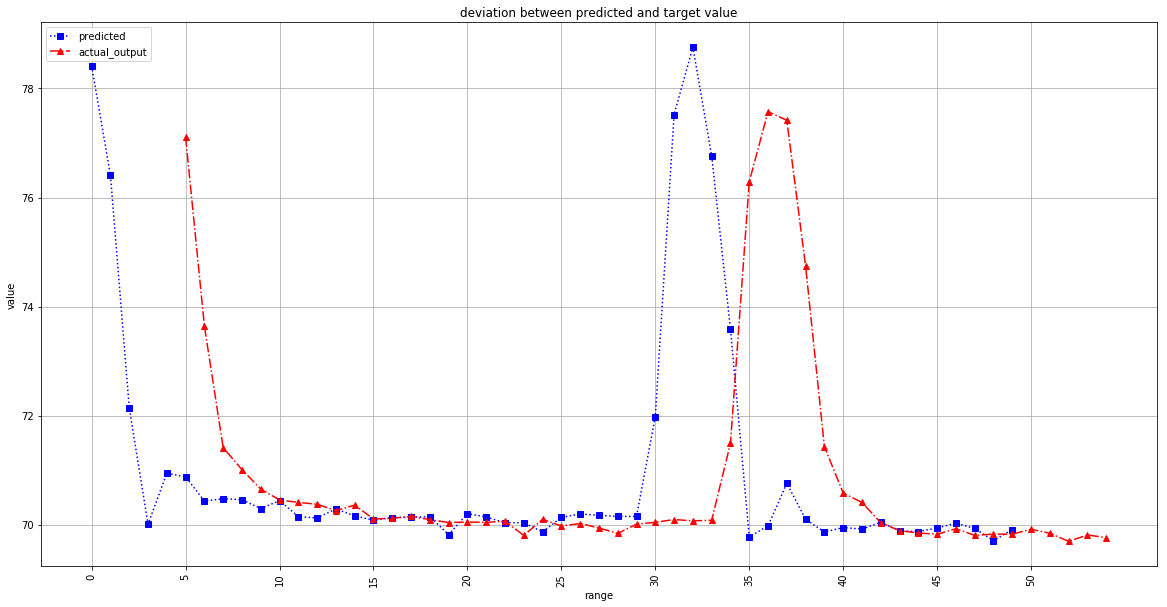

In [108]:
actual_data = range(55)


plt.plot(yhat[0:50],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:],y_conv_LSTM_test[0:50],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,55,5))
plt.xticks( rotation=90)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

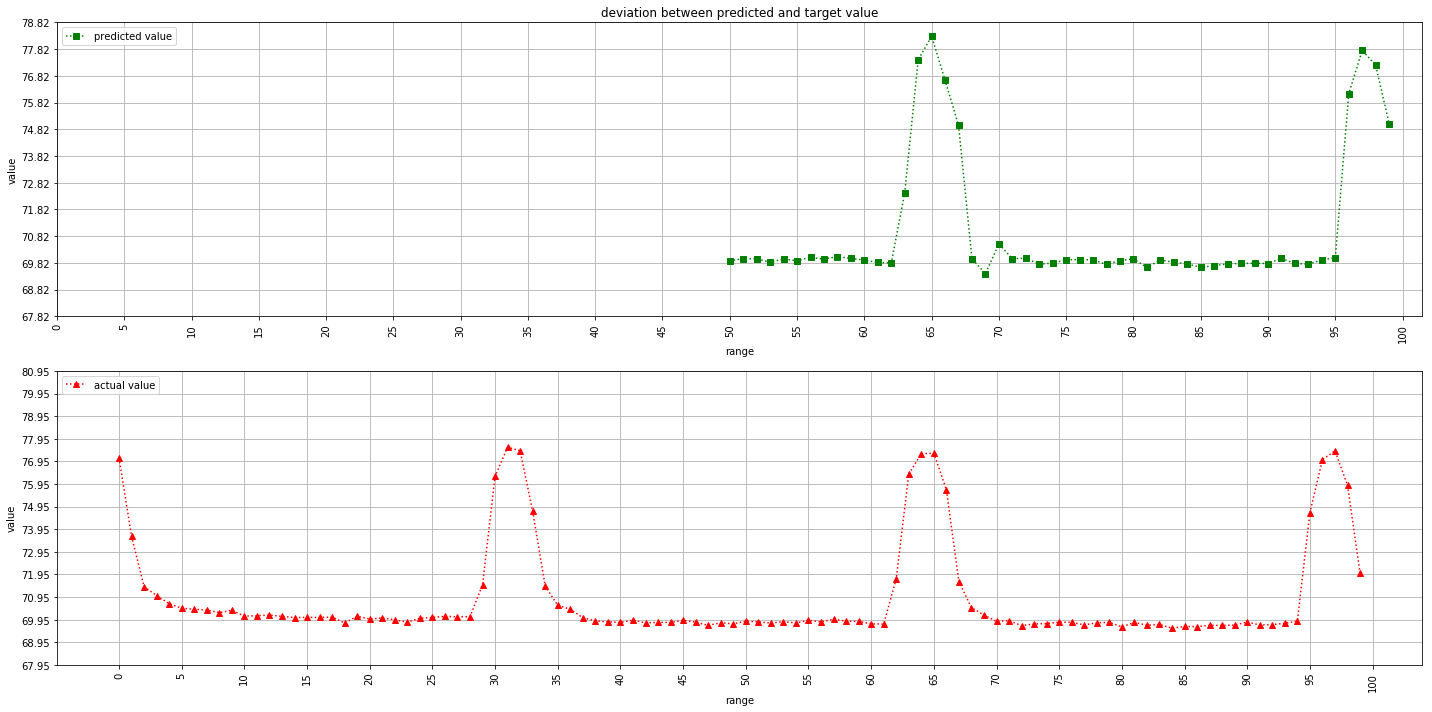

In [121]:
x_range_1 = range(100)

plt.subplot(2,1,1)
plt.title('deviation between predicted and target value')
plt.plot(x_range_1[50:],yhat[50:100],color='green',marker='s', linestyle=':')
plt.grid(b=None, which='both', axis='both')
plt.legend(['predicted value'], loc='upper left')
plt.ylabel('value')
plt.xlabel('range')
plt.xticks(np.arange(0,105,5))
plt.yticks(np.arange(min(yhat),max(yhat),1))
plt.xticks( rotation=90)

plt.subplot(2,1,2)
plt.plot(y_conv_LSTM_test[0:100],color='red',marker='^', linestyle=':')
plt.grid(b=None, which='both', axis='both')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.legend(['actual value'], loc='upper left')
# plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,105,5))
plt.yticks(np.arange(min(y_conv_LSTM_test),max(y_conv_LSTM_test),1))
plt.xticks( rotation=90)

plt.ylabel('value')
plt.xlabel('range')


plt.savefig('res.png')
plt.tight_layout()
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(y_conv_LSTM_test,yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

mean squared error:  1.0438359694966564
RMSE Error:  1.0216829104456315


In [69]:
min(yhat)

array([67.815475], dtype=float32)

In [83]:
# count =0
# for idx,i in enumerate(yhat):
#     print(count,'\t',yhat[idx+5])
#     count += 1


count =0
for idx,i in enumerate(yhat):
    print(count,'\t',i)
    count += 1

0 	 [78.41221]
1 	 [76.4062]
2 	 [72.14296]
3 	 [70.00981]
4 	 [70.94461]
5 	 [70.87604]
6 	 [70.43574]
7 	 [70.476326]
8 	 [70.45932]
9 	 [70.29647]
10 	 [70.441055]
11 	 [70.15058]
12 	 [70.12173]
13 	 [70.289825]
14 	 [70.16191]
15 	 [70.08414]
16 	 [70.13014]
17 	 [70.13709]
18 	 [70.14755]
19 	 [69.816086]
20 	 [70.2039]
21 	 [70.14093]
22 	 [70.03889]
23 	 [70.033035]
24 	 [69.86781]
25 	 [70.13428]
26 	 [70.198044]
27 	 [70.172424]
28 	 [70.152435]
29 	 [70.15192]
30 	 [71.98425]
31 	 [77.52275]
32 	 [78.757996]
33 	 [76.76507]
34 	 [73.58743]
35 	 [69.775314]
36 	 [69.97938]
37 	 [70.75871]
38 	 [70.10106]
39 	 [69.86582]
40 	 [69.948074]
41 	 [69.91867]
42 	 [70.04541]
43 	 [69.886]
44 	 [69.87467]
45 	 [69.9405]
46 	 [70.028725]
47 	 [69.93144]
48 	 [69.70661]
49 	 [69.91185]
50 	 [69.893684]
51 	 [69.97221]
52 	 [69.96667]
53 	 [69.84241]
54 	 [69.95888]
55 	 [69.89641]
56 	 [70.020706]
57 	 [69.95712]
58 	 [70.0479]
59 	 [69.98549]
60 	 [69.916275]
61 	 [69.83154]
62 	 [69.

In [86]:
print(yhat.shape)
print(y_conv_LSTM_test.shape)

(496, 1)
(496, 1)
